<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_5_illustrated_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 9.3: DALL·E Existing Images [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 9.4: MultiModal Models [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* **Part 9.5: Illustrated Book** [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain langchain_openai langchain_community pypdf pdfkit wkhtmltopdf
    !apt-get install wkhtmltopdf

Note: using Google CoLab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 720.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 11.1 MB

# 3.5: LLM Writes a Book

In a previous module, we built an LLM-based book generator that automated the creation of a book from start to finish. This process included generating a synopsis, outlining the table of contents, and then iteratively writing the chapters into a structured markdown document. Now, we will expand on that work by incorporating DALLE to generate a cover image for the book, adding a visual element to complement the text-based content.

We begin by accessing a large language model with a temperature of 0.7. We use a higher temperature to encourage creativity.

In [2]:
from langchain.chains.summarize import load_summarize_chain
from langchain import OpenAI, PromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'

llm = ChatOpenAI(
        model=MODEL,
        temperature=0.7,
        n=1
    )


We create a simple utility function to query the LLM with a custom system prompt. The system prompt tells the LLM that it is assisting in creating a book.

In [3]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)
from langchain_openai import ChatOpenAI

def query_llm(prompt):
  messages = [
      SystemMessage(
          content="You are assistant helping to write a book."
      ),
      HumanMessage(
          content=prompt
      ),
  ]

  output = llm.invoke(messages)
  return output.content



In this section, we will expand the functionality of our LLM-based book generator by adding a visual component: a cover image for the book. While our previous work focused on generating a complete markdown document containing the book’s synopsis, table of contents, and chapters, this enhancement introduces the power of DALLE to generate a custom cover image based on the content of the book.

The function render_dalle3 has been added to accomplish this. By leveraging the OpenAI API, we will generate an image using DALLE 3 based on a given prompt, which could be the title or a descriptive aspect of the book. This image is created at the required resolution of 1024x1024 pixels and can be resized to fit any custom dimensions specified by the user. The generated cover image will be saved as a JPEG file, and optionally, it can be displayed using the Python matplotlib library.

This feature not only enriches the generated book with a professional cover but also demonstrates the seamless integration of text and image generation, making the book creation process even more comprehensive and visually appealing.

In [4]:
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
from openai import OpenAI

def render_dalle3(prompt, filename, height, width):
    # Initialize the OpenAI client
    client = OpenAI()

    # Generate the image using DALL-E 3 at the required 1024x1024 resolution
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",  # DALL-E 3 requires 1024x1024
        quality="standard",
        n=1,
    )

    # Get the image URL from the response
    image_url = response.data[0].url

    # Fetch the image content from the URL
    response2 = requests.get(image_url)
    img = Image.open(io.BytesIO(response2.content))

    # Resize the image to the requested dimensions (height x width)
    img_resized = img.resize((width, height), Image.LANCZOS)

    # Save the resized image
    img_resized.save(filename, "JPEG")

    # Optionally display the resized image
    plt.imshow(img_resized)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()

    return img_resized


## Generate Title, Synopsis and Table of Contents

For this book, we allow the user to specify the subject specified by the SUBJECT variable. We then request the LLM to generate a random title based on this subject. It is essential that the prompt request that the LLM only the; LLMs often like to prefix with text such as "Here is a random title."

In [5]:
SUBJECT = "international spy thriller"

title = query_llm(f"""
Give me a random title for a book on the subject '{SUBJECT}'.
Return only the title, no additional text.
""").strip(" '\"")
print(title)

Veil of Deception


Now that we have a title, we can request a random synopsis of the book.

In [6]:
synopsis = query_llm(f"""
Give me a synopsis for a book of the title '{SUBJECT}' for a book on the subject '{SUBJECT}'.
Return only the synopsis, no additional text.
""").strip(" '\"")
print(synopsis)

In a world teetering on the brink of chaos, seasoned intelligence officer Mia Carter uncovers a covert operation orchestrated by a rogue faction within a powerful global organization. As she delves deeper, she discovers a web of deceit that spans continents, involving double agents, high-tech espionage, and a stolen bio-weapon capable of catastrophic destruction. Racing against time, Mia must navigate a labyrinth of betrayal while forming uneasy alliances with a mysterious hacker and a disillusioned ex-spy. With the clock ticking and enemies lurking at every turn, Mia must outsmart her adversaries and prevent an international incident that could ignite a war. In a high-stakes game of cat and mouse, loyalties will be tested, secrets will be revealed, and only the most cunning will survive in this electrifying international spy thriller.


Next, we generate the table of contents. For this generation, we provide all previous information. We also request a particular format for the table of contents. You may notice that I ask for the chapter numbers, even though they are an increasing numeric count and could easily be derived. This process works better because the LLM wants to provide the chapter numbers, and attempts to suppress chapter numbers are often inconsistent. It is easier to allow the LLM to generate chapter numbers but control where it generates them so that I can consistently remove them later.

Cover prompt: "Book cover design for an electrifying international spy thriller, featuring a determined female intelligence officer in a dark, high-tech urban environment. Incorporate elements of espionage such as shadows of double agents, digital code, and a looming bio-weapon silhouette. The color scheme should be moody with blues and blacks, hinting at danger and intrigue, while the title appears in bold, striking font at the top."


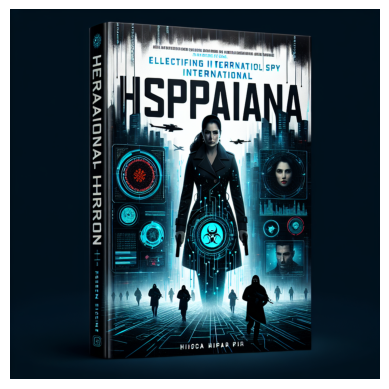

In [7]:
cover_prompt = query_llm(f"Give me a stable diffusion prompt for the cover of a book with the following synopsis:"
                         f"Return only the prompt, no extra text."
                f"{synopsis}")
print(f"Cover prompt: {cover_prompt}")
# Get the current working directory
current_directory = os.getcwd()
# Combine the directory with the file name to get the absolute path
file_path = os.path.join(current_directory, "cover.jpg")
image = render_dalle3(cover_prompt, file_path, 768, 768)

In [8]:
toc = query_llm(f"""
Give me a table of contents for a book of the title '{title}' for a book on
the subject '{SUBJECT}' the book synopsis is '{synopsis}'.
Return the table of contents as a list of chapter titles.
Separate the chapter number and chapter title with a pipe character '|'.
Return only the chapter names, no additional text.
""").strip(" '\"")
print(toc)

1 | Shadows of Betrayal  
2 | The Whispering Threat  
3 | A Dangerous Alliance  
4 | The Hacker's Code  
5 | Undercover in the Abyss  
6 | The Stolen Secrets  
7 | A Race Against Time  
8 | Web of Deceit  
9 | The Ex-Spy's Redemption  
10 | Unmasking the Enemy  
11 | The Brink of War  
12 | Double Edges  
13 | Infiltration  
14 | The Countdown Begins  
15 | Betrayals Unveiled  
16 | The Final Confrontation  
17 | Echoes of the Past  
18 | Unraveling the Veil  
19 | A New Dawn  
20 | The Price of Truth


We must now parse the table of contents and remove the pipes and chapter numbers.

In [9]:
# Split the string into lines
lines = toc.splitlines()

# Extract titles using list comprehension
toc2 = [line.split('|')[1].strip() for line in lines if line]

# Print the list of titles
print(toc2)

['Shadows of Betrayal', 'The Whispering Threat', 'A Dangerous Alliance', "The Hacker's Code", 'Undercover in the Abyss', 'The Stolen Secrets', 'A Race Against Time', 'Web of Deceit', "The Ex-Spy's Redemption", 'Unmasking the Enemy', 'The Brink of War', 'Double Edges', 'Infiltration', 'The Countdown Begins', 'Betrayals Unveiled', 'The Final Confrontation', 'Echoes of the Past', 'Unraveling the Veil', 'A New Dawn', 'The Price of Truth']


## Generate the Chapters of the Book

Next, we create a function capable of producing the text that makes up a chapter. To ensure that the function has enough context to generate each chapter, we provide the synopsis, the table of contents, and the chapter number. To test this code, we request that it develop a single chapter.

In [10]:
def render_chapter(num, chapter_title, title, subject, synopsis, toc):
  txt = query_llm(f"""
  Write Chapter {num}, titled "{chapter_title}" for a book of the title '{title}' for a book on
  the subject '{subject}' the book synopsis is '{synopsis}' the table of contents is '{toc}'.
  Give me only the chapter text, no chapter heading, no chapter title, number, no additional text.
  """).strip(" '\"")
  return txt

txt = render_chapter(1, toc2[0], title, SUBJECT, synopsis, toc)
print(txt)

Mia Carter stood at the edge of the rooftop, her breath forming small clouds in the chilly night air as she surveyed the sprawling city beneath her. The lights twinkled like distant stars, but beneath that shimmering facade lay a world riddled with shadows—betrayal, deceit, and danger. As a seasoned intelligence officer, she had learned that nothing was ever as it appeared.

Her phone buzzed in her pocket, pulling her from her thoughts. The screen lit up with an encrypted message from her contact within the agency. She quickly glanced around, ensuring no one was watching, before unlocking the message. 

“I need you to meet me. Urgent. -R”

R had been her mentor, a man she trusted implicitly, which is why the urgency in his message sent a shiver down her spine. They had spent years in the field together, unraveling conspiracies and exposing threats, but something felt different this time. The stakes seemed higher, the atmosphere charged with an unspoken tension that made the hair on the

We can now generate the entire book in Markdown, which allows some formatting. We begin by rendering the title and synopsis, the table of contents, and each chapter.

In [11]:
import base64

book = ""

# Render the title
book += f"# {title}\n"

# Read and encode the image as base64
with open(file_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

# Render the book cover
book = f"# {title}\n<img src='data:image/jpeg;base64,{encoded_string}' alt='title'>\n\n"
book += f"## Synopsis\n\n{synopsis}\n\n"

# Render the toc
book += f"\n## Table of Contents\n\n"
num = 1
for chapter_title in toc2:
  book += f"{num}. {chapter_title}\n"
  num += 1


# Render the book
chapter = 1
for chapter_title in toc2:
  print(f"Rendering chapter {chapter}/{len(toc2)}: {chapter_title}")
  txt = render_chapter(chapter, chapter_title, title, SUBJECT, synopsis, toc)
  book += f"\n\n## Chapter {chapter}: {chapter_title}\n"
  book += f"{txt}\n"
  chapter += 1


Rendering chapter 1/20: Shadows of Betrayal
Rendering chapter 2/20: The Whispering Threat
Rendering chapter 3/20: A Dangerous Alliance
Rendering chapter 4/20: The Hacker's Code
Rendering chapter 5/20: Undercover in the Abyss
Rendering chapter 6/20: The Stolen Secrets
Rendering chapter 7/20: A Race Against Time
Rendering chapter 8/20: Web of Deceit
Rendering chapter 9/20: The Ex-Spy's Redemption
Rendering chapter 10/20: Unmasking the Enemy
Rendering chapter 11/20: The Brink of War
Rendering chapter 12/20: Double Edges
Rendering chapter 13/20: Infiltration
Rendering chapter 14/20: The Countdown Begins
Rendering chapter 15/20: Betrayals Unveiled
Rendering chapter 16/20: The Final Confrontation
Rendering chapter 17/20: Echoes of the Past
Rendering chapter 18/20: Unraveling the Veil
Rendering chapter 19/20: A New Dawn
Rendering chapter 20/20: The Price of Truth


## Generate a PDF of the Book

Now that we have generated the book, we have saved it as a PDF.

In [12]:
import markdown
import pdfkit

# Convert Markdown to HTML
html = markdown.markdown(book)
options = {
    'encoding': "UTF-8",  # Ensures UTF-8 encoding
}

pdfkit.from_string(html, 'output.pdf', options=options)

True

We can now download the generated book.

In [13]:
from google.colab import files
files.download("output.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>